In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_snippets = pd.read_csv('datasets/00_snippets.csv')

In [3]:
df_snippets.columns

Index(['claim_id', 'snippet_content', 'snippet_date', 'snippet_id',
       'snippet_pagenum', 'snippet_title', 'snippet_url', 'claim_content',
       'claim_date', 'claim_label', 'claim_tag', 'claim_url', 'date_number'],
      dtype='object')

In [4]:
df_snippets.head(2)

,claim_id,snippet_content,snippet_date,snippet_id,snippet_pagenum,snippet_title,snippet_url,claim_content,claim_date,claim_label,claim_tag,claim_url,date_number
0,3,"News on Japan, Business News, Opinion, Sports,...",17636,0,0,Article expired | The Japan Times,https://www.japantimes.co.jp/article-expired/,Black and Latino people in NYC are arrested at...,17646,True,— PolitiFact New York,/new-york/statements/2018/apr/25/kirsten-gilli...,0
1,3,Get the latest breaking news across the U.S. o...,17636,1,0,"U.S. News | Latest National News, Videos …",https://abcnews.go.com/US/,Black and Latino people in NYC are arrested at...,17646,True,— PolitiFact New York,/new-york/statements/2018/apr/25/kirsten-gilli...,0


In [5]:
df_snippets_grouped = df_snippets[['claim_id','snippet_id','snippet_date']].groupby(['claim_id','snippet_date']).count().reset_index()
df_snippets_grouped.head()

,claim_id,snippet_date,snippet_id
0,3,17636,18
1,3,17637,18
2,3,17638,39
3,3,17639,12
4,3,17640,59


In [6]:
df_snippets_sorted = df_snippets_grouped.sort_values(by=['snippet_id'], ascending=False)
df_snippets_head = df_snippets_sorted.head(10)
df_snippets_head

,claim_id,snippet_date,snippet_id
8623,3293,16839,100
9535,3590,16744,100
1029,371,17545,100
17006,6188,16096,100
17004,6188,16094,100
18704,6752,15957,100
11928,4399,16532,100
29432,10186,15253,100
43332,14215,13929,100
29431,10186,15252,100


In [7]:
df_snippets_merge = pd.merge(df_snippets_head[['claim_id','snippet_date']], 
                             df_snippets[['claim_id','snippet_date','snippet_id','claim_content','snippet_content']])
df_snippets_merge[['claim_id','snippet_date','snippet_id']].groupby(['claim_id','snippet_date']).count().reset_index().sort_values(by=['snippet_id'], ascending=False)

,claim_id,snippet_date,snippet_id
0,371,17545,100
1,3293,16839,100
2,3590,16744,100
3,4399,16532,100
4,6188,16094,100
5,6188,16096,100
6,6752,15957,100
7,10186,15252,100
8,10186,15253,100
9,14215,13929,100


In [8]:
len(df_snippets_merge)

1000

In [9]:
df_snippets_merge.head(2)

,claim_id,snippet_date,snippet_id,claim_content,snippet_content
0,3293,16839,673435,Not one Republican has the guts to recognize t...,I was going to make the same argument that Joe...
1,3293,16839,673436,Not one Republican has the guts to recognize t...,"As you can see, I don't think any one problem ..."


In [10]:
dic_groundtruth = {}

In [22]:
df_snippets_merge['claim_id'].unique()

array([ 4229,   292, 13683, 11160,   187, 14203,   121,  1085,  4338,
        5779])

In [90]:
df_ = df_snippets_merge[df_snippets_merge['claim_id']==5779]
df_['claim_content'].unique()

array(['Health care premiums up 90 percent in New Hampshire.'],
      dtype=object)

In [91]:
df_['snippet_id'].head()

486    1213098
487    1213099
488    1213100
489    1213101
490    1213102
Name: snippet_id, dtype: int64

In [92]:
df_[['snippet_id','snippet_content']].to_csv('df_gt.csv')

In [93]:
df_recup = pd.read_csv('df_gt.csv')

In [94]:
dic_groundtruth[5779] = df_recup[['snippet_id','groundtruth_label']].as_matrix()

In [95]:
dic_groundtruth.keys()

dict_keys([4229, 292, 13683, 11160, 187, 14203, 121, 1085, 4338, 5779])

In [107]:
df_groundtruth = pd.DataFrame([list(x) for k in dic_groundtruth for x in list(dic_groundtruth[k])], columns=['snippet_id','groundtruth_label'])

In [108]:
df_groundtruth_merge = pd.merge(df_groundtruth, df_snippets_merge)

In [109]:
len(df_groundtruth_merge)

534

In [110]:
df_groundtruth_merge.columns

Index(['snippet_id', 'groundtruth_label', 'claim_id', 'snippet_date',
       'claim_content', 'snippet_content'],
      dtype='object')

In [111]:
df_groundtruth_merge.to_csv('datasets/relevance_discovery_groundtruth.csv')

In [2]:
df_groundtruth_merge = pd.read_csv('datasets/relevance_discovery_groundtruth.csv')

In [3]:
df_groundtruth_merge.head(2)

,Unnamed: 0,snippet_id,groundtruth_label,claim_id,snippet_date,claim_content,snippet_content
0,0,887759,True,4229,16577,We spend more money on lobbying than we do on ...,22/05/2015 · Will London's mayor put the brake...
1,1,887760,False,4229,16577,We spend more money on lobbying than we do on ...,22/05/2015 · ... Facebook for First Draft upda...


In [9]:
df_count = df_groundtruth_merge['groundtruth_label'].value_counts()
df_count.index = ['Irrelevant', 'Relevant']
df_count

Irrelevant    443
Relevant       91
Name: groundtruth_label, dtype: int64

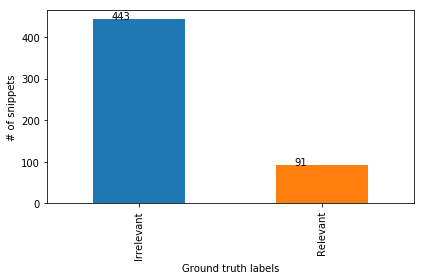

In [11]:
ax = df_count.plot(kind='bar')

ax.set_ylabel('# of snippets')

ax.set_xlabel('Ground truth labels')

plt.tight_layout()

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() +0.1, p.get_height() +0.02))
    
plt.savefig('01_relevant_irrelevant_snippets.png')